In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score, StratifiedKFold,cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score,classification_report,roc_curve, auc,precision_recall_curve,average_precision_score

from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Input/Telecom_Customer_Details.csv")
print(f"Data frame has a {df.shape[0]} rows and {df.shape[1]} features")
print()
df.head(5)

Data frame has a 7043 rows and 21 features



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
features = df.columns.values
print(f"Feature names : ",features)

Feature names :  ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [5]:
print("Features\t\tData type")
print()
print("***************************")
print(df.dtypes)

Features		Data type

***************************
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print("Features \t\t Missing Values")
print()
print("***************************")
print(df.isna().sum())
print("***************************")
print(df.isna().sum().sum())

Features 		 Missing Values

***************************
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
***************************
0


<Axes: >

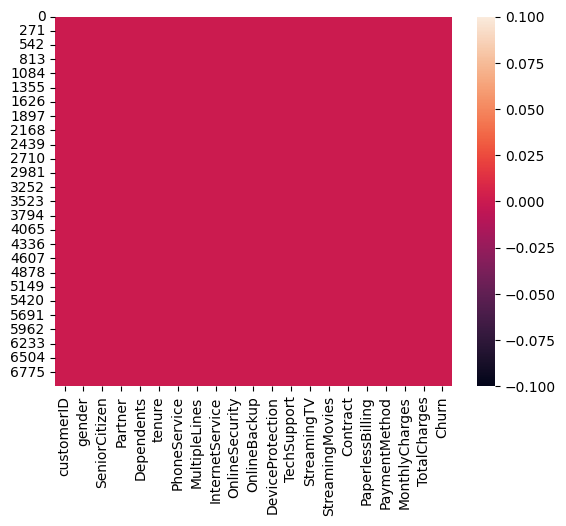

In [9]:
sns.heatmap(df.isna())

In [10]:
df["TotalCharges"]

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
5,820.5
6,1949.4
7,301.9
8,3046.05
9,3487.95


In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [12]:
df["TotalCharges"].isna().sum() * 100/ len(df)

0.15618344455487718

In [13]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
20.2,11
19.75,9
20.05,8
19.9,8
19.65,8
19.55,7
45.3,7
19.45,6
20.25,6


In [14]:
df = df[df["TotalCharges"].notnull()]
print(f"Data frame has a {df.shape[0]} rows and {df.shape[1]} features")
print()
df.head(5)

Data frame has a 7032 rows and 21 features



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
print(df["TotalCharges"].dtype)
df["TotalCharges"] = df["TotalCharges"].astype(float)
print(df["TotalCharges"].dtype)

object
float64


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df = df.drop('customerID',axis = 1)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
print("Numerical features:",df.describe().columns.values)
print()
df.describe().T

Numerical features: ['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges']



,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [19]:
df_copy = df.copy(deep = True)

le = LabelEncoder()

categorical_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

numerical_features = df.describe().columns.values

print(categorical_features)
print(numerical_features)
print()
# Use One Hot Encoding preprocessing techinique for Linear family Models
# For Ensemble Models Label Encoder  preprocessing techinique is best
print("Label Transformation")
for i in categorical_features:
  df_copy[i] = le.fit_transform(df_copy[i])
  print(i,"--->",df_copy[i].unique(),le.inverse_transform(df_copy[i].unique()))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges']

Label Transformation
gender ---> [0 1] ['Female' 'Male']
Partner ---> [1 0] ['Yes' 'No']
Dependents ---> [0 1] ['No' 'Yes']
PhoneService ---> [0 1] ['No' 'Yes']
MultipleLines ---> [1 0 2] ['No phone service' 'No' 'Yes']
InternetService ---> [0 1 2] ['DSL' 'Fiber optic' 'No']
OnlineSecurity ---> [0 2 1] ['No' 'Yes' 'No internet service']
OnlineBackup ---> [2 0 1] ['Yes' 'No' 'No internet service']
DeviceProtection ---> [0 2 1] ['No' 'Yes' 'No internet service']
TechSupport ---> [0 2 1] ['No' 'Yes' 'No internet service']
StreamingTV ---> [0 2 1] ['No' 'Yes' 'No internet service']
StreamingMovies ---> [0 2 1] ['No' 'Yes' 'No internet service']
Contract ---> [0 1 2] ['Month-to-month' 'O

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [21]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


In [22]:
churn = df_copy[df_copy["Churn"]==1].describe().T
churn

,count,mean,std,min,25%,50%,75%,max
gender,1869.0,0.497592,0.500128,0.00,0.00,0.00,1.0,1.00
SeniorCitizen,1869.0,0.254682,0.435799,0.00,0.00,0.00,1.0,1.00
Partner,1869.0,0.357945,0.479524,0.00,0.00,0.00,1.0,1.00
Dependents,1869.0,0.174425,0.379576,0.00,0.00,0.00,0.0,1.00
tenure,1869.0,17.979133,19.531123,1.00,2.00,10.00,29.0,72.00
PhoneService,1869.0,0.909042,0.287626,0.00,1.00,1.00,1.0,1.00
MultipleLines,1869.0,1.000535,0.953692,0.00,0.00,1.00,2.0,2.00
InternetService,1869.0,0.814874,0.521459,0.00,1.00,1.00,1.0,2.00
OnlineSecurity,1869.0,0.376137,0.742044,0.00,0.00,0.00,0.0,2.00
OnlineBackup,1869.0,0.620118,0.891995,0.00,0.00,0.00,2.0,2.00


In [23]:
not_churn = df_copy[df_copy["Churn"]==0].describe().T
not_churn

,count,mean,std,min,25%,50%,75%,max
gender,5163.0,0.507263,0.499996,0.00,0.000,1.00,1.000,1.00
SeniorCitizen,5163.0,0.128995,0.335227,0.00,0.000,0.00,0.000,1.00
Partner,5163.0,0.527600,0.499286,0.00,0.000,1.00,1.000,1.00
Dependents,5163.0,0.343405,0.474891,0.00,0.000,0.00,1.000,1.00
tenure,5163.0,37.650010,24.076940,1.00,15.000,38.00,61.000,72.00
PhoneService,5163.0,0.901220,0.298395,0.00,1.000,1.00,1.000,1.00
MultipleLines,5163.0,0.918846,0.945943,0.00,0.000,1.00,2.000,2.00
InternetService,5163.0,0.893473,0.800209,0.00,0.000,1.00,2.000,2.00
OnlineSecurity,5163.0,0.938795,0.850810,0.00,0.000,1.00,2.000,2.00
OnlineBackup,5163.0,1.009297,0.852959,0.00,0.000,1.00,2.000,2.00


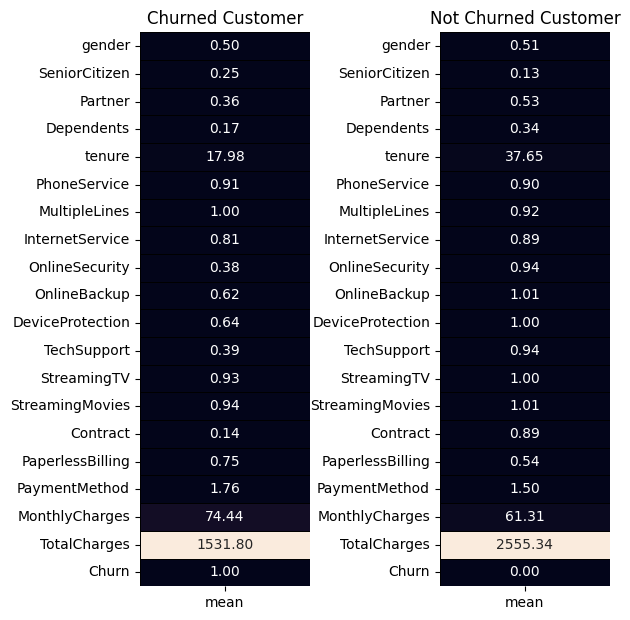

In [24]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(6,6))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot=True, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')

plt.title('Churned Customer')


plt.title('Churned Customer')

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']], annot=True, linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Not Churned Customer')

fig.tight_layout(pad=0)

In [25]:
features = df_copy.columns
categorical_features = []
numerical_features = []
for i in features:
  if len(df[i].unique()) >6:
    numerical_features.append(i)
  else:
      categorical_features.append(i)
print("Categorical features :",*categorical_features)
print()
print("Numerical features :",*numerical_features)

Categorical features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn

Numerical features : tenure MonthlyCharges TotalCharges


In [26]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [27]:
df_copy.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [28]:
# ls = list(df_copy["Churn"].value_counts())
# print(ls)
df_copy["Churn"].value_counts()

,count
Churn,
0,5163
1,1869


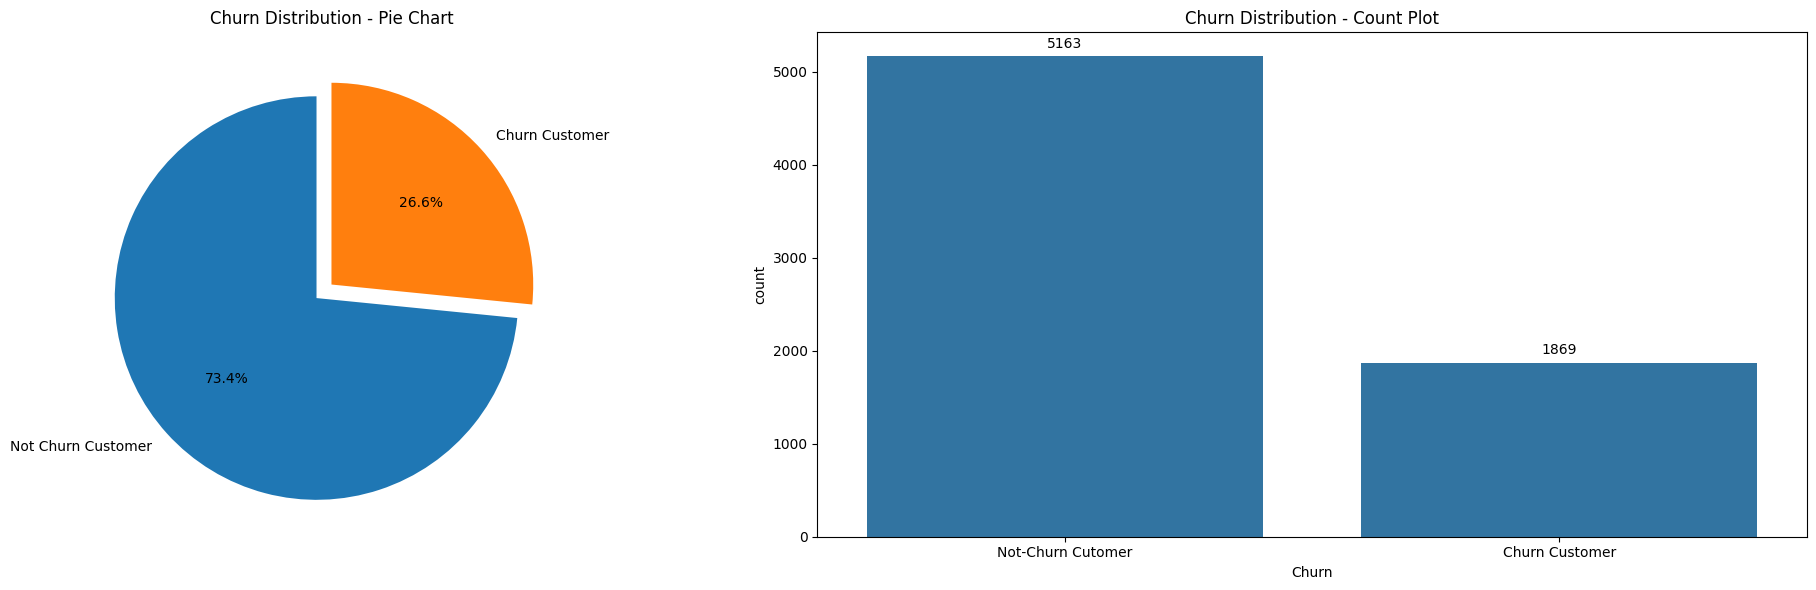

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(20,6))
axes[0].pie(df_copy["Churn"].value_counts(), labels=["Not Churn Customer", "Churn Customer"], autopct='%1.1f%%', explode = (0.1,0),startangle=90)
axes[0].set_title('Churn Distribution - Pie Chart')
sns.countplot(data=df, x="Churn", ax=axes[1])
axes[1].set_title('Churn Distribution - Count Plot')
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
axes[1].set_xticklabels(['Not-Churn Cutomer', 'Churn Customer'])
plt.tight_layout()
plt.show()

In [31]:
# Removing Churn variable as it's target
categorical_features.remove('Churn')
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
# Case 1 : Customer information
l1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
# Case 2 : Payment information
l2 = ['Contract',  'PaperlessBilling',  'PaymentMethod']
# Case 3 : Service Subscribed
l3 = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
      'OnlineBackup',  'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

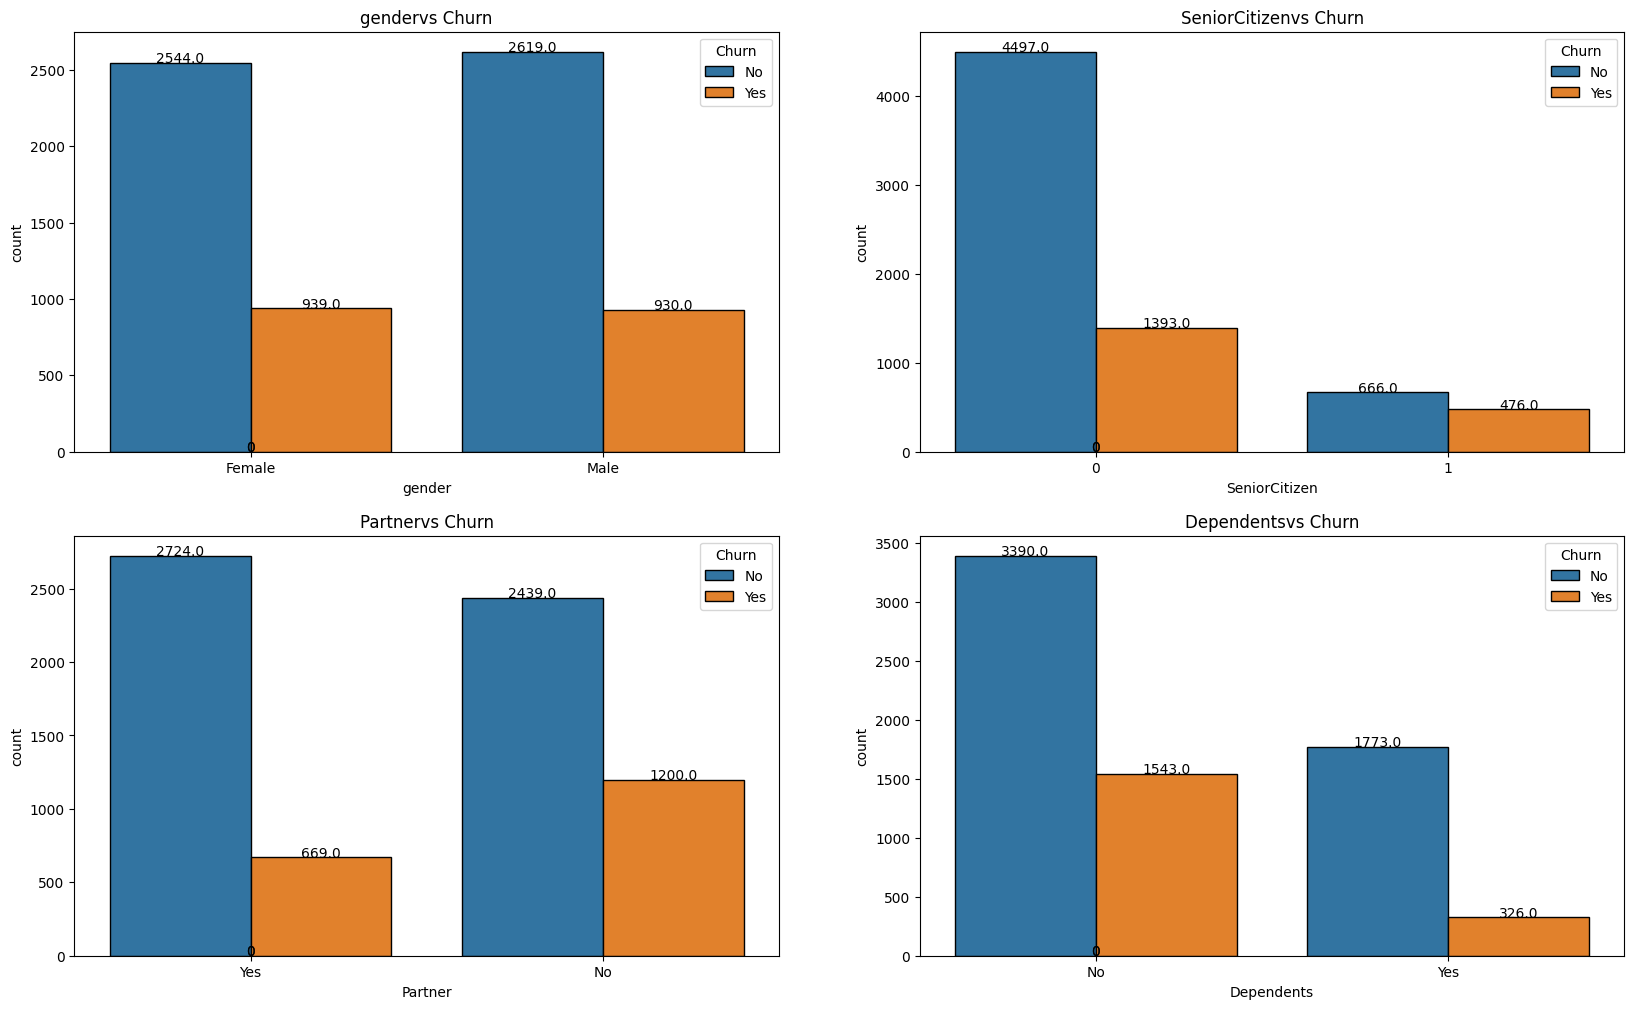

In [36]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=l1[i], data=df, hue='Churn', edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + 'vs Churn'
        plt.title(title);

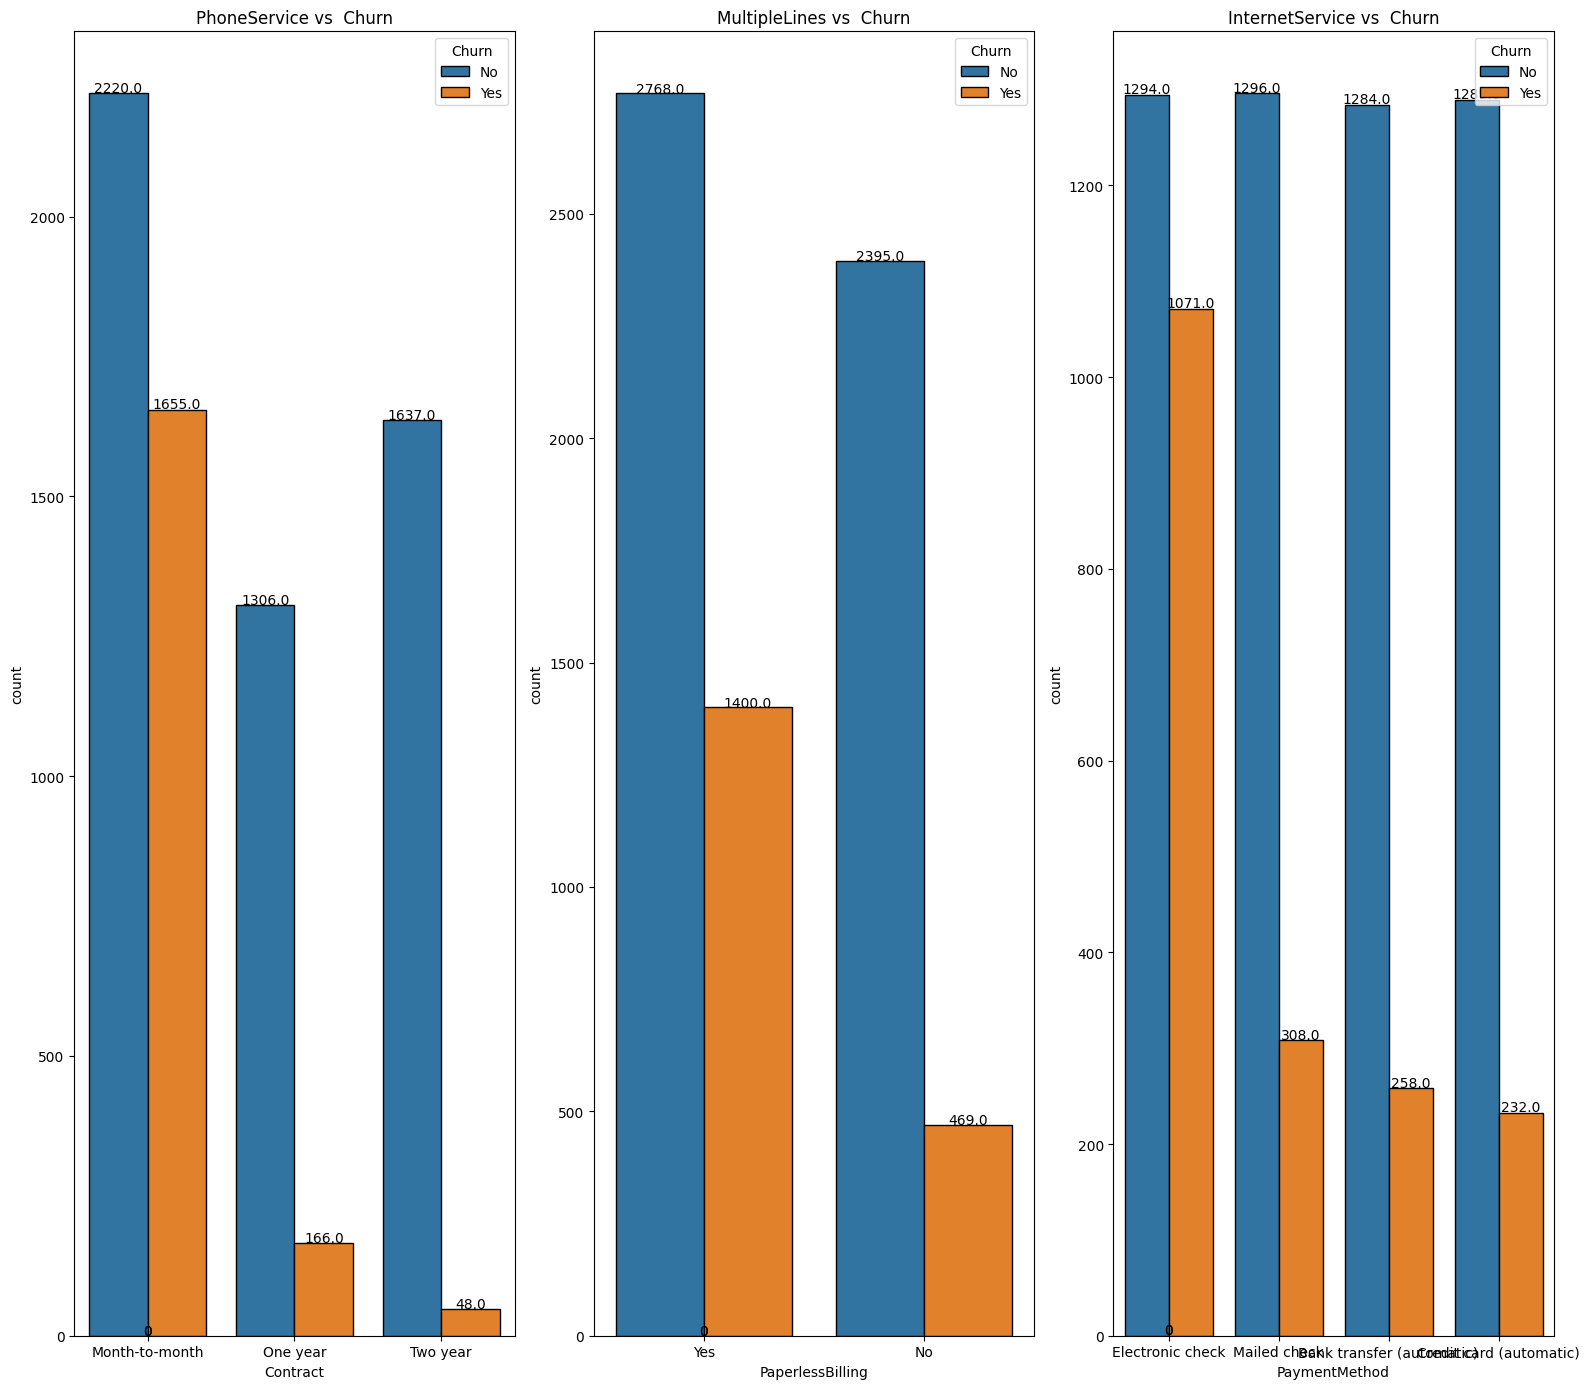

In [38]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l2[0:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot(x=l2[i], data=df, hue='Churn', edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + ' vs  Churn'
        plt.title(title)
        plt.tight_layout();

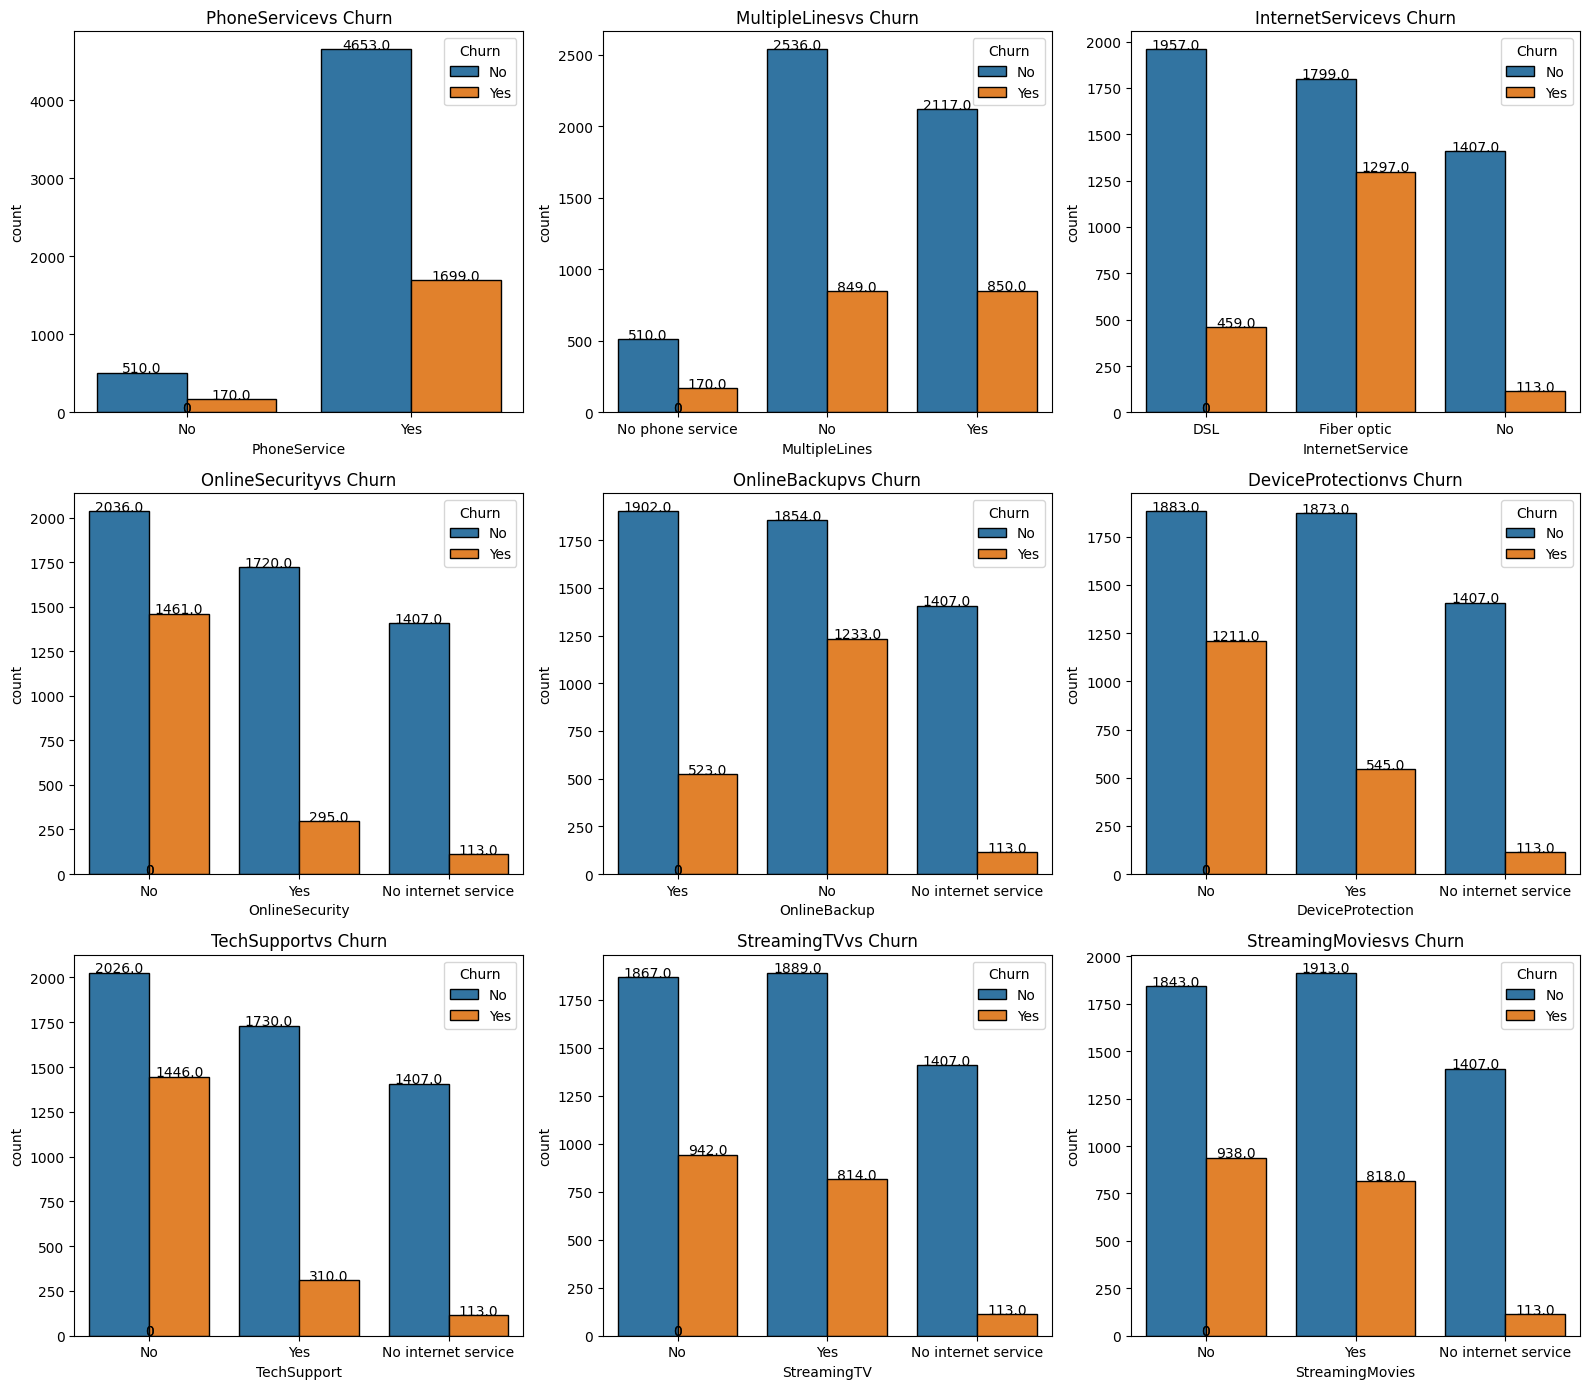

In [40]:
fig  = plt.subplots(nrows=2, ncols=2, figsize=(16,14))
for i in range(len(l3)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=l3[i], data=df, hue='Churn', edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l3[i] + 'vs Churn'
        plt.title(title)
        plt.tight_layout();

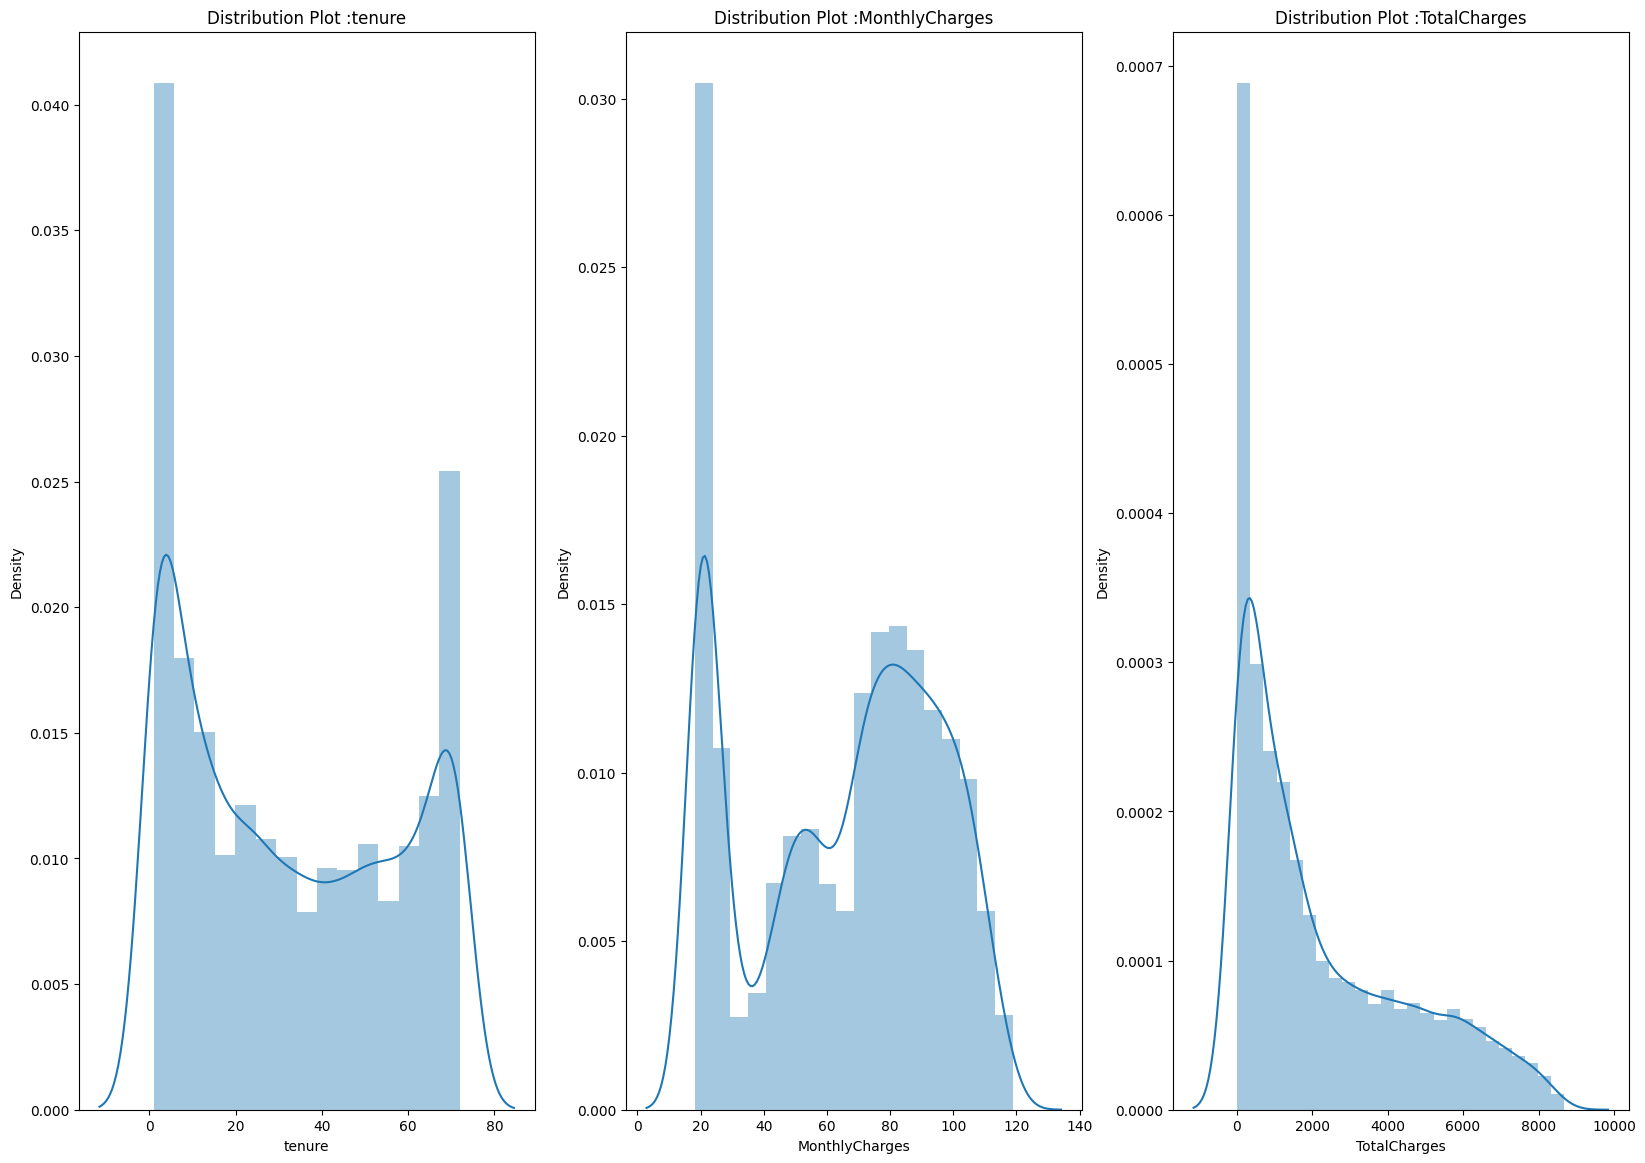

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,14))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df_copy[numerical_features[i]])
    title = 'Distribution Plot :' + numerical_features[i]
    plt.title(title)
plt.show()

In [44]:
# ['tenure', 'MonthlyCharges', 'TotalCharges']
# Feature scaling is required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_copy['tenure'] = scaler.fit_transform(df_copy[['tenure']])
df_copy['MonthlyCharges'] = scaler.fit_transform(df_copy[['MonthlyCharges']])
df_copy['TotalCharges'] = scaler.fit_transform(df_copy[['TotalCharges']])
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [45]:
df_copy.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,-1.126643e-16,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,6.062651e-17,-1.119064e-16,0.265785
std,0.500014,0.368844,0.499729,0.457629,1.000071e+00,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,1.000071e+00,1.000071e+00,0.441782
min,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.547283e+00,-9.990692e-01,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.709769e-01,-8.302488e-01,0.000000
50%,1.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.845440e-01,-3.908151e-01,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.199259e-01,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,8.331482e-01,6.668271e-01,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.793381e+00,2.824261e+00,1.000000


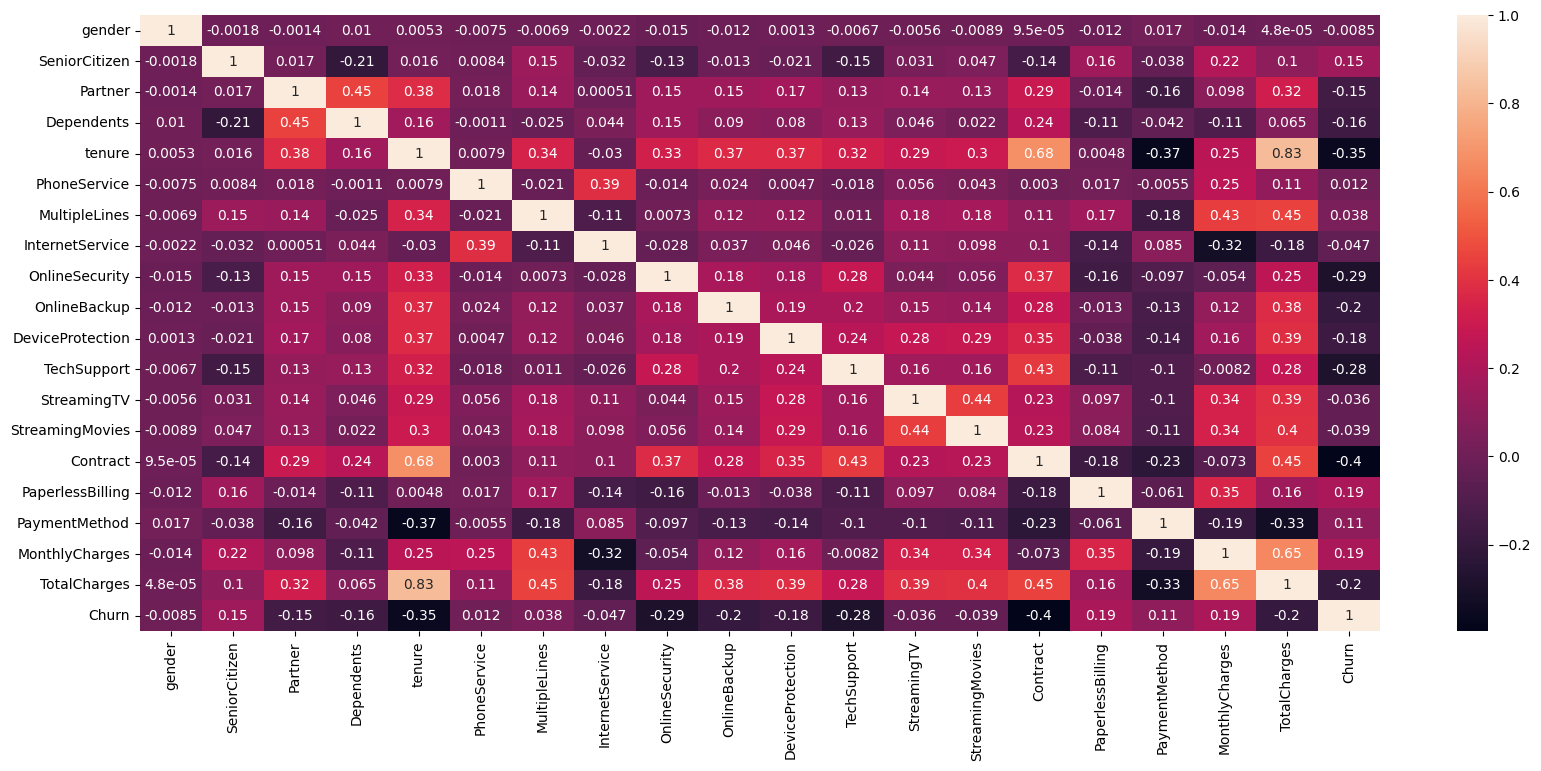

In [47]:
# Correlation

plt.figure(figsize=(20,8))
sns.heatmap(df_copy.corr(),  annot=True);

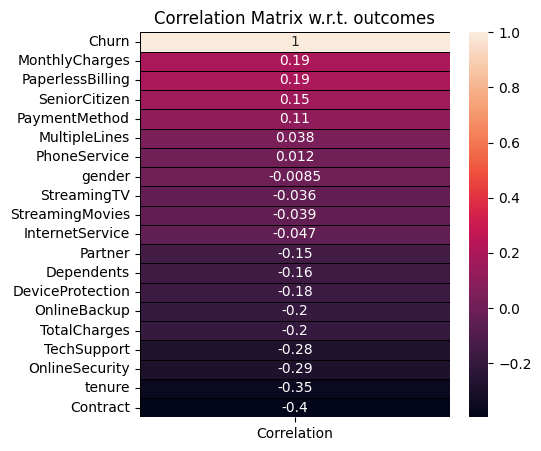

In [49]:
corr = df_copy.corrwith(df_copy['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot=True,  linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

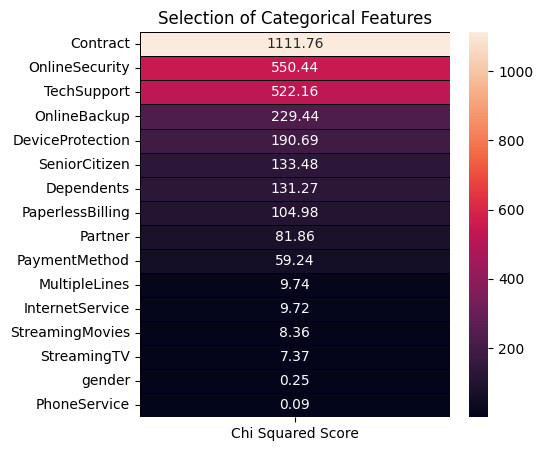

In [51]:
# categorical_features - chi-square test
# numerical_features  - Anova test
# Chi-Square Test :
features = df_copy.loc[:,categorical_features] # char
target = df_copy.loc[:,'Churn'] # cat
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

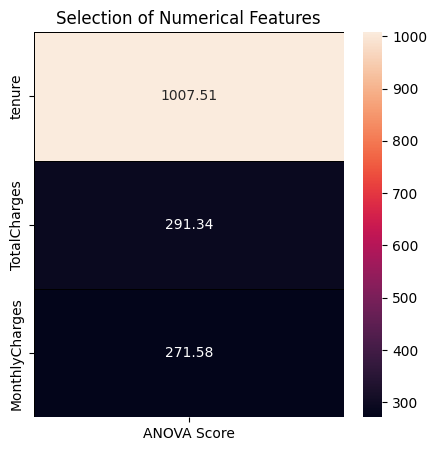

In [53]:
# Anova Testing

features = df_copy.loc[:,numerical_features]
target = df_copy.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [54]:
# Drop the non-significant variable
df_copy.drop(columns = ['gender','PhoneService','StreamingTV','StreamingMovies','InternetService','MultipleLines'], inplace=True)
df_copy.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,-1.280248,0,2,0,0,0,1,2,-1.161694,-0.994194,0
1,0,0,0,0.064303,2,0,2,0,1,0,3,-0.260878,-0.173740,0
2,0,0,0,-1.239504,2,2,0,0,0,1,3,-0.363923,-0.959649,1
3,0,0,0,0.512486,2,0,2,2,1,0,0,-0.747850,-0.195248,0
4,0,0,0,-1.239504,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [55]:
# Handling imbalance dataset
import imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
smote = SMOTE()
f1 = df_copy.iloc[:,:-1].values
t1 = df_copy.iloc[:,-1].values
f1, t1 = smote.fit_resample(f1, t1)
print(df_copy.iloc[:,-1].value_counts())
print(Counter(t1))

Churn
0    5163
1    1869
Name: count, dtype: int64
Counter({0: 5163, 1: 5163})


In [71]:
X_train, X_test, y_train, y_test = train_test_split(f1,t1, test_size=0.2, random_state=101, stratify=t1)


In [70]:
models = []
train_f1_scores = []
test_f1_scores = []
train_precision_scores = []
test_precision_scores = []
train_recall_scores = []
test_recall_scores = []
train_roc_auc_scores = []
test_roc_auc_scores = []

### Logistic Regression

In [75]:
lr = LogisticRegression(random_state=42)

param_grid = {

    'C': [10**-4,10**-2,10**0,10**2,10**4],
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ", grid_search_lr.best_params_)

best_lr = grid_search_lr.best_estimator_


y_train_pred_lr = best_lr.predict(X_train)
y_train_proba_lr = best_lr.predict_proba(X_train)[:, 1]
y_test_pred_lr = best_lr.predict(X_test)
y_test_proba_lr = best_lr.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_lr)
train_precision = precision_score(y_train, y_train_pred_lr)
train_recall = recall_score(y_train, y_train_pred_lr)
train_roc_auc = roc_auc_score(y_train, y_train_proba_lr)


test_f1 = f1_score(y_test, y_test_pred_lr)
test_precision = precision_score(y_test, y_test_pred_lr)
test_recall = recall_score(y_test, y_test_pred_lr)
test_roc_auc = roc_auc_score(y_test, y_test_proba_lr)

# Append scores to lists

models.append("Logistic Regression")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")


print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")


print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred_lr))

Best parameters for Logistic Regression:  {'C': 100}

Train Metrics:
F1 Score: 0.7775213477959844
Precision: 0.7427248677248677
Recall: 0.8157384987893462
ROC-AUC Score: 0.8500043970475293

Test Metrics:
F1 Score: 0.7862453531598513
Precision: 0.7560321715817694
Recall: 0.818973862536302
ROC-AUC Score: 0.8558812807554008

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1033
           1       0.76      0.82      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



### Decision Tree Classifier

In [76]:
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree Classifier: ", grid_search_dt.best_params_)

best_dt = grid_search_dt.best_estimator_


y_train_pred_dt = best_dt.predict(X_train)
y_train_proba_dt = best_dt.predict_proba(X_train)[:, 1]
y_test_pred_dt = best_dt.predict(X_test)
y_test_proba_dt = best_dt.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_dt)
train_precision = precision_score(y_train, y_train_pred_dt)
train_recall = recall_score(y_train, y_train_pred_dt)
train_roc_auc = roc_auc_score(y_train, y_train_proba_dt)


test_f1 = f1_score(y_test, y_test_pred_dt)
test_precision = precision_score(y_test, y_test_pred_dt)
test_recall = recall_score(y_test, y_test_pred_dt)
test_roc_auc = roc_auc_score(y_test, y_test_proba_dt)

# Append scores to lists

models.append("Decision Tree Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")


print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")


print("\nDecision Tree Classifier Clasification Report:")
print(classification_report(y_test, y_test_pred_dt))

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Train Metrics:
F1 Score: 0.8476868327402136
Precision: 0.8309302325581396
Recall: 0.8651331719128329
ROC-AUC Score: 0.9292760700948004

Test Metrics:
F1 Score: 0.8015340364333653
Precision: 0.7939221272554606
Recall: 0.8092933204259438
ROC-AUC Score: 0.8603691913233105

Decision Tree Classifier Clasification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.79      0.81      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



### Random Forest Classifier

In [77]:
rf = RandomForestClassifier(random_state=42,warm_start=True)



param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

# Use RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1', random_state=42)

random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest Classifier: ", random_search_rf.best_params_)

best_rf = random_search_rf.best_estimator_

# Predict and evaluate
y_train_pred_rf = best_rf.predict(X_train)
y_train_proba_rf = best_rf.predict_proba(X_train)[:, 1]
y_test_pred_rf = best_rf.predict(X_test)
y_test_proba_rf = best_rf.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_rf)
train_precision = precision_score(y_train, y_train_pred_rf)
train_recall = recall_score(y_train, y_train_pred_rf)
train_roc_auc = roc_auc_score(y_train, y_train_proba_rf)

test_f1 = f1_score(y_test, y_test_pred_rf)
test_precision = precision_score(y_test, y_test_pred_rf)
test_recall = recall_score(y_test, y_test_pred_rf)
test_roc_auc = roc_auc_score(y_test, y_test_proba_rf)

# Append scores to lists
models.append("Random Forest Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_rf))


Best parameters for Random Forest Classifier:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Train Metrics:
F1 Score: 0.9952904238618524
Precision: 0.9927728258251024
Recall: 0.997820823244552
ROC-AUC Score: 0.9998999818255367

Test Metrics:
F1 Score: 0.8524271844660194
Precision: 0.8549172346640701
Recall: 0.8499515972894482
ROC-AUC Score: 0.9211120159611803

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1033
           1       0.85      0.85      0.85      1033

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



### Gradient Boost Classifier

In [78]:
gbm = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
# Use RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_gbm.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier: ", random_search_gbm.best_params_)

best_gbm = random_search_gbm.best_estimator_

# Predict and evaluate
y_train_pred_gbm = best_gbm.predict(X_train)
y_train_proba_gbm = best_gbm.predict_proba(X_train)[:, 1]
y_test_pred_gbm = best_gbm.predict(X_test)
y_test_proba_gbm = best_gbm.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_gbm)
train_precision = precision_score(y_train, y_train_pred_gbm)
train_recall = recall_score(y_train, y_train_pred_gbm)
train_roc_auc = roc_auc_score(y_train, y_train_proba_gbm)

test_f1 = f1_score(y_test, y_test_pred_gbm)
test_precision = precision_score(y_test, y_test_pred_gbm)
test_recall = recall_score(y_test, y_test_pred_gbm)
test_roc_auc = roc_auc_score(y_test, y_test_proba_gbm)

# Append scores to lists
models.append("Gradient Boosting Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nGradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_gbm))


Best parameters for Gradient Boosting Classifier:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

Train Metrics:
F1 Score: 0.8826881975777725
Precision: 0.8660298229263746
Recall: 0.9
ROC-AUC Score: 0.9547253604113293

Test Metrics:
F1 Score: 0.8377467501203659
Precision: 0.8333333333333334
Recall: 0.8422071636011617
ROC-AUC Score: 0.923036878835786

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.83      0.84      0.84      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



### Ada Boost Classifier

In [79]:
adb = AdaBoostClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Use RandomizedSearchCV
random_search_adb = RandomizedSearchCV(estimator=adb, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_adb.fit(X_train, y_train)

print("Best parameters for Ada Boost Classifier: ", random_search_adb.best_params_)

best_adb = random_search_adb.best_estimator_

# Predict and evaluate
y_train_pred_adb = best_adb.predict(X_train)
y_train_proba_adb = best_adb.predict_proba(X_train)[:, 1]
y_test_pred_adb = best_adb.predict(X_test)
y_test_proba_adb = best_adb.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_adb)
train_precision = precision_score(y_train, y_train_pred_adb)
train_recall = recall_score(y_train, y_train_pred_adb)
train_roc_auc = roc_auc_score(y_train, y_train_proba_adb)

test_f1 = f1_score(y_test, y_test_pred_adb)
test_precision = precision_score(y_test, y_test_pred_adb)
test_recall = recall_score(y_test, y_test_pred_adb)
test_roc_auc = roc_auc_score(y_test, y_test_proba_adb)

# Append scores to lists
models.append("Ada Boost Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nAda Boost Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_adb))


Best parameters for Ada Boost Classifier:  {'n_estimators': 200, 'learning_rate': 1.0}

Train Metrics:
F1 Score: 0.8391477405759774
Precision: 0.8123300090661831
Recall: 0.8677966101694915
ROC-AUC Score: 0.9169279294596322

Test Metrics:
F1 Score: 0.8308858360966367
Precision: 0.813543599257885
Recall: 0.8489835430784124
ROC-AUC Score: 0.9152732340039116

Ada Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1033
           1       0.81      0.85      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



### XG Boost Classifier

In [80]:
xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Use RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)

random_search_xgb.fit(X_train, y_train)

print("Best parameters for XG Boost Classifier: ", random_search_xgb.best_params_)

best_xgb = random_search_xgb.best_estimator_

# Predict and evaluate
y_train_pred_xgb = best_xgb.predict(X_train)
y_train_proba_xgb = best_xgb.predict_proba(X_train)[:, 1]
y_test_pred_xgb = best_xgb.predict(X_test)
y_test_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

train_f1 = f1_score(y_train, y_train_pred_xgb)
train_precision = precision_score(y_train, y_train_pred_xgb)
train_recall = recall_score(y_train, y_train_pred_xgb)
train_roc_auc = roc_auc_score(y_train, y_train_proba_xgb)

test_f1 = f1_score(y_test, y_test_pred_xgb)
test_precision = precision_score(y_test, y_test_pred_xgb)
test_recall = recall_score(y_test, y_test_pred_xgb)
test_roc_auc = roc_auc_score(y_test, y_test_proba_xgb)

# Append scores to lists
models.append("XG Boost Classifier")
train_f1_scores.append(train_f1)
test_f1_scores.append(test_f1)
train_precision_scores.append(train_precision)
test_precision_scores.append(test_precision)
train_recall_scores.append(train_recall)
test_recall_scores.append(test_recall)
train_roc_auc_scores.append(train_roc_auc)
test_roc_auc_scores.append(test_roc_auc)

print("\nTrain Metrics:")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"ROC-AUC Score: {train_roc_auc}")

print("\nTest Metrics:")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"ROC-AUC Score: {test_roc_auc}")

print("\nXG Boost Classifier Classification Report:")
print(classification_report(y_test, y_test_pred_xgb))


Best parameters for XG Boost Classifier:  {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Train Metrics:
F1 Score: 0.9347646573080098
Precision: 0.9114331723027376
Recall: 0.9593220338983051
ROC-AUC Score: 0.9836878037627

Test Metrics:
F1 Score: 0.8451923076923077
Precision: 0.839541547277937
Recall: 0.850919651500484
ROC-AUC Score: 0.9241440966967143

XG Boost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.84      0.85      0.85      1033

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      2066
weighted avg       0.84      0.84      0.84      2066



In [81]:
models_data = {
    "Model Name": models,
    "Train F1 Score": train_f1_scores,
    "Train Precision": train_precision_scores,
    "Train Recall": train_recall_scores,
    "Train ROC-AUC Score": train_roc_auc_scores,
    "Test F1 Score": test_f1_scores,
    "Test Precision": test_precision_scores,
    "Test Recall": test_recall_scores,
    "Test ROC-AUC Score": test_roc_auc_scores
}

model_results = pd.DataFrame(models_data)
model_results

,Model Name,Train F1 Score,Train Precision,Train Recall,Train ROC-AUC Score,Test F1 Score,Test Precision,Test Recall,Test ROC-AUC Score
0,Logistic Regression,0.777521,0.742725,0.815738,0.850004,0.786245,0.756032,0.818974,0.855881
1,Decision Tree Classifier,0.847687,0.830930,0.865133,0.929276,0.801534,0.793922,0.809293,0.860369
2,Random Forest Classifier,0.995290,0.992773,0.997821,0.999900,0.852427,0.854917,0.849952,0.921112
3,Gradient Boosting Classifier,0.882688,0.866030,0.900000,0.954725,0.837747,0.833333,0.842207,0.923037
4,Ada Boost Classifier,0.839148,0.812330,0.867797,0.916928,0.830886,0.813544,0.848984,0.915273
5,XG Boost Classifier,0.934765,0.911433,0.959322,0.983688,0.845192,0.839542,0.850920,0.924144


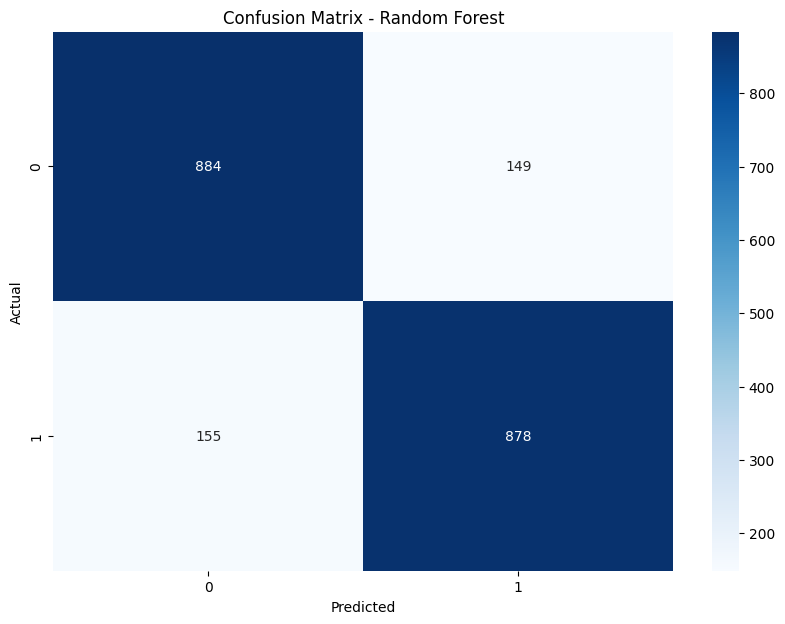

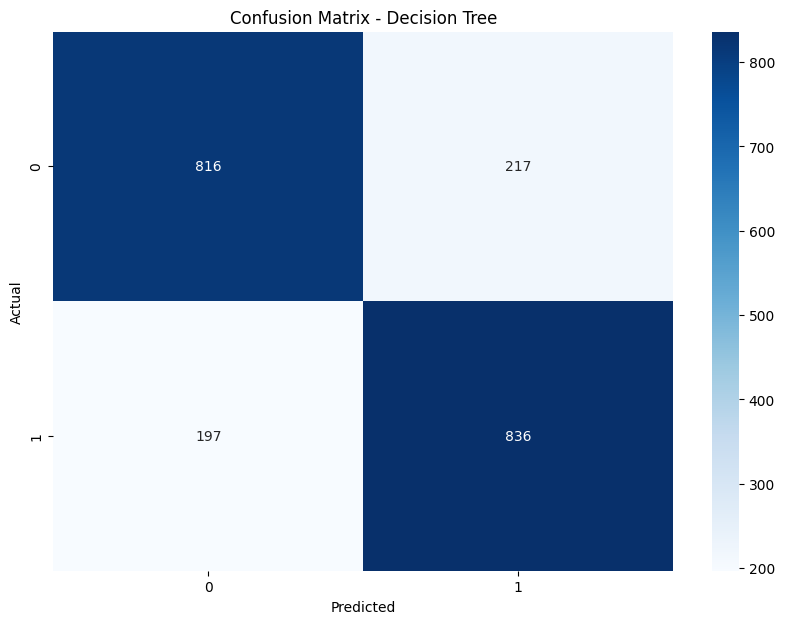

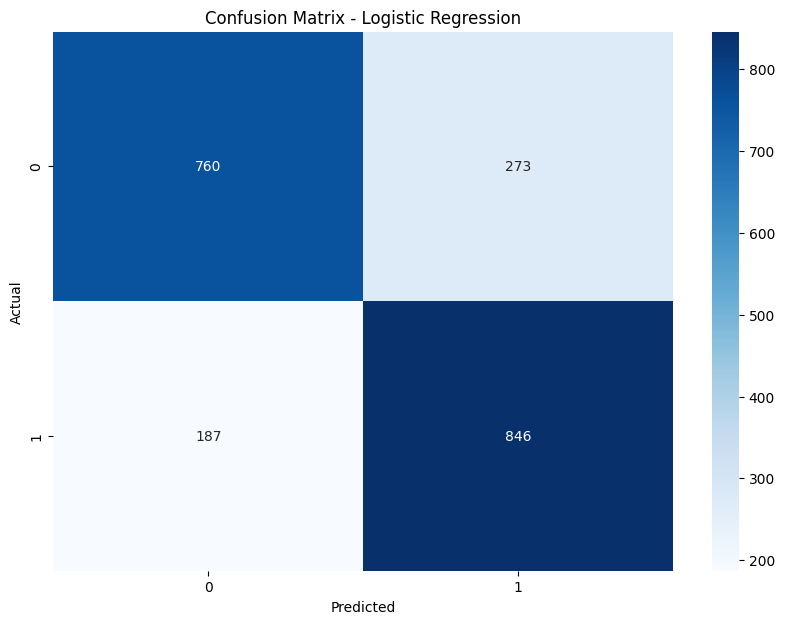

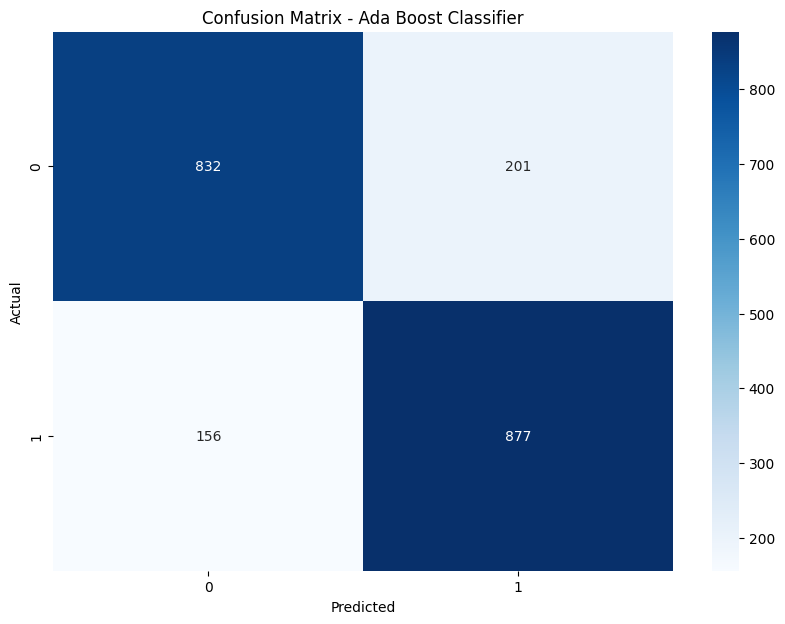

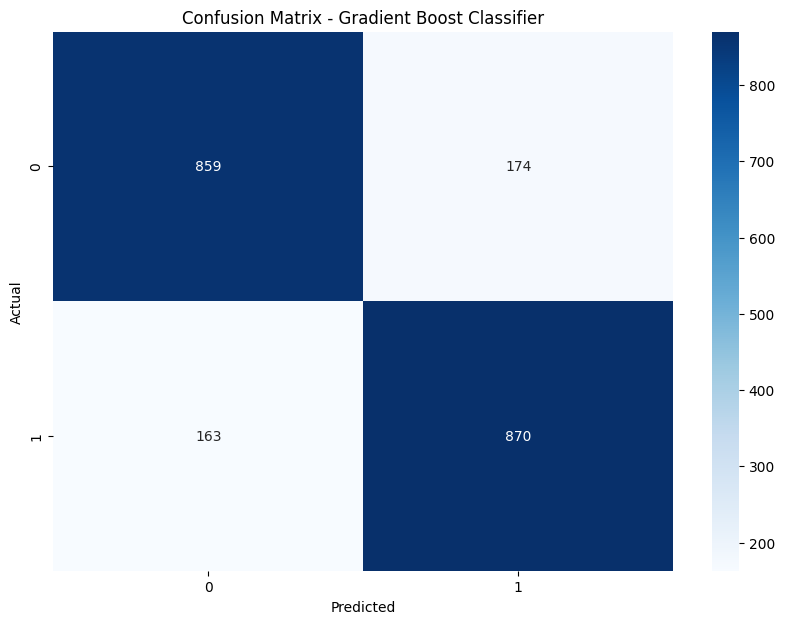

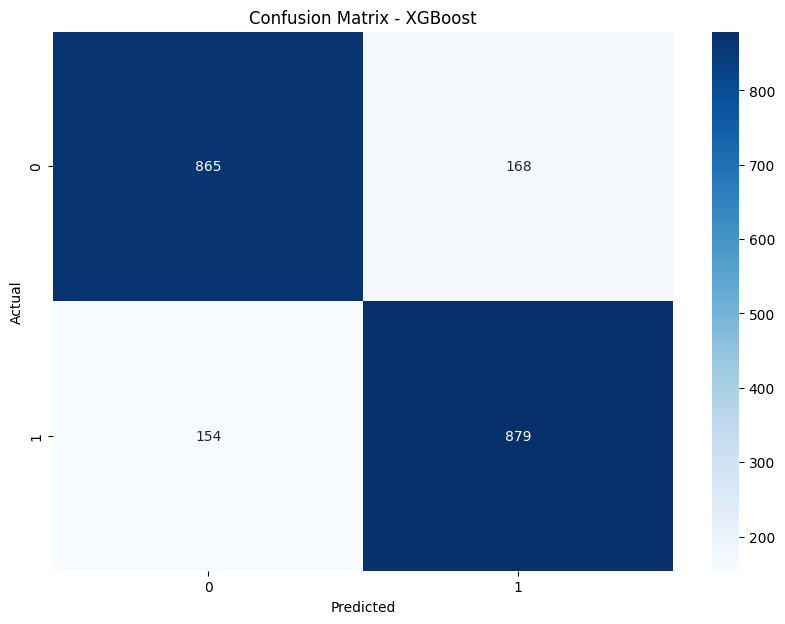

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_test_pred_rf, "Random Forest")

plot_confusion_matrix(y_test, y_test_pred_dt, "Decision Tree")

plot_confusion_matrix(y_test, y_test_pred_lr, "Logistic Regression")

plot_confusion_matrix(y_test, y_test_pred_adb, "Ada Boost Classifier")

plot_confusion_matrix(y_test, y_test_pred_gbm, "Gradient Boost Classifier")

plot_confusion_matrix(y_test, y_test_pred_xgb, "XGBoost")


## Conclusion

After evaluating multiple models for predicting telecom customer churn, the following key insights were derived:

### Logistic Regression:
- Achieved a test ROC-AUC score of 85.59% and an F1 score of 78.62%.
- Demonstrated balanced performance with moderate precision and recall.

### Decision Tree Classifier:
- Achieved a test ROC-AUC score of 86.04% and an F1 score of 80.15%.
- Showed slightly better performance than logistic regression, but with some risk of overfitting.

### Random Forest Classifier:
- Achieved a high train ROC-AUC score of 99.99% and test ROC-AUC score of 92.11%.
- The model showed excellent performance, indicating its robustness in predicting churn, with a test F1 score of 85.24%.

### Gradient Boosting Classifier:
- Achieved a test ROC-AUC score of 92.30% and an F1 score of 83.77%.
- Demonstrated strong performance with balanced precision and recall, slightly lower than Random Forest.

### Ada Boost Classifier:
- Achieved a test ROC-AUC score of 91.53% and an F1 score of 83.09%.
- Performed well, showing strong generalization capability.

### XG Boost Classifier:
- Achieved a test ROC-AUC score of 92.41% and an F1 score of 84.52%.
- This model showed the best overall performance among all models, with balanced precision and recall.

## Recommendation

Based on the evaluation metrics, the **XGBoost Classifier** is recommended for predicting telecom customer churn due to its superior performance in terms of test ROC-AUC score (92.41%) and balanced F1 score (84.52%). This model effectively balances the trade-off between precision and recall, making it a reliable choice for identifying customers at risk of churning.

## Business Impact

Implementing the XGBoost churn prediction model can significantly benefit the telecom company by:
- Identifying at-risk customers with high accuracy, allowing for targeted retention strategies.
- Reducing customer churn rates and increasing customer loyalty.
- Enhancing revenue by focusing on customer retention rather than acquisition.
